In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas_datareader as web

In [2]:
tick = pd.read_csv("nifty_sec.csv", header=0, index_col='Unnamed: 0')

In [3]:
tick.head()

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5.0,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,EQ,03-MAY-1995,10.0,1,INE253B01015,10
2,3IINFOLTD,3i Infotech Limited,EQ,22-OCT-2021,10.0,1,INE748C01038,10
3,3MINDIA,3M India Limited,EQ,13-AUG-2004,10.0,1,INE470A01017,10
4,3PLAND,3P Land Holdings Limited,EQ,19-JUL-1995,2.0,1,INE105C01023,2


In [6]:
ticker = list(tick['SYMBOL'])
# ticker

In [8]:
ticker = [s +".NS" for s in ticker]
ticker[:5]

['20MICRONS.NS', '21STCENMGM.NS', '3IINFOLTD.NS', '3MINDIA.NS', '3PLAND.NS']

In [9]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()

df = web.get_data_yahoo(ticker[11], start, end)

In [10]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-09-19,11.06250,10.125,10.64375,10.6750,485600.0,6.959886
2003-09-22,11.20625,10.775,10.77500,11.1875,1109600.0,7.294025


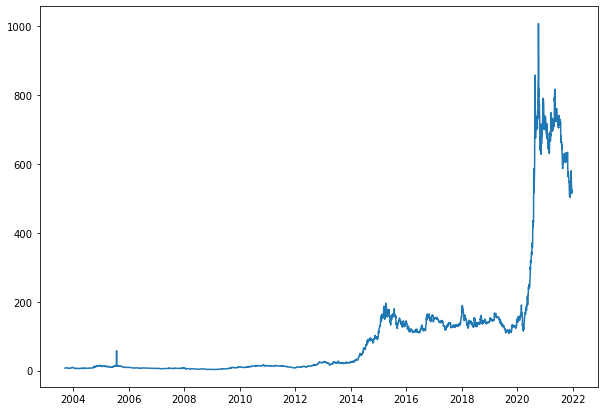

In [11]:
plt.figure(figsize=(10,7))
plt.plot(df['Adj Close'])

In [12]:
len(df)

4526

In [20]:
window = 30

num_samples = len(df) - window
indices = np.arange(num_samples).astype(int)[:,None] + np.arange(window+1).astype(int)
indices

array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [4493, 4494, 4495, ..., 4521, 4522, 4523],
       [4494, 4495, 4496, ..., 4522, 4523, 4524],
       [4495, 4496, 4497, ..., 4523, 4524, 4525]])

In [21]:
data = df['Adj Close'].values[indices]
data

array([[  6.95988607,   7.29402542,   7.5833416 , ...,   6.37717915,
          6.69909334,   7.03730822],
       [  7.29402542,   7.5833416 ,   7.40812159, ...,   6.69909334,
          7.03730822,   7.19215298],
       [  7.5833416 ,   7.40812159,   7.29809904, ...,   7.03730822,
          7.19215298,   7.0699091 ],
       ...,
       [552.90002441, 552.90002441, 546.65002441, ..., 523.09997559,
        521.09997559, 524.79998779],
       [552.90002441, 546.65002441, 549.09997559, ..., 521.09997559,
        524.79998779, 523.        ],
       [546.65002441, 549.09997559, 539.5       , ..., 524.79998779,
        523.        , 519.15002441]])

In [22]:
X = data[:, :-1]
y = data[:, -1]

In [24]:
X[0].shape

(30,)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [26]:
X_train, y_train

(array([[  6.95988607,   7.29402542,   7.5833416 , ...,   6.56054783,
           6.37717915,   6.69909334],
        [  7.29402542,   7.5833416 ,   7.40812159, ...,   6.37717915,
           6.69909334,   7.03730822],
        [  7.5833416 ,   7.40812159,   7.29809904, ...,   6.69909334,
           7.03730822,   7.19215298],
        ...,
        [132.78233337, 129.77461243, 129.49226379, ..., 143.48744202,
         140.86027527, 140.02545166],
        [129.77461243, 129.49226379, 129.16078186, ..., 140.86027527,
         140.02545166, 138.23310852],
        [129.49226379, 129.16078186, 126.05484772, ..., 140.02545166,
         138.23310852, 137.65611267]]),
 array([  7.03730822,   7.19215298,   7.0699091 , ..., 138.23310852,
        137.65611267, 137.1282196 ]))

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

7.044267946177508

In [35]:
split_frac = 0.8
split_indices = int(split_frac * num_samples)

In [43]:
df['pred'] = y_pred[:-window]

ValueError: Length of values (870) does not match length of index (4526)

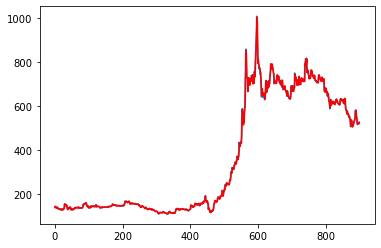

In [44]:
plt.plot(y_test)
plt.plot(y_pred, c='r')

In [34]:
y_pred

array([ 137.49019645,  140.28517787,  142.87620817,  140.65775   ,
        136.67403662,  136.11333861,  134.86573534,  138.81472849,
        138.15989834,  134.87316614,  133.2752825 ,  133.27898586,
        130.73036301,  130.81447468,  132.28163403,  131.73088809,
        129.24846967,  127.66700743,  127.43542985,  129.03652273,
        130.83830234,  126.68915871,  130.1892817 ,  129.91465411,
        127.52568771,  128.4713489 ,  130.68722035,  131.54577074,
        136.04484864,  152.32636271,  149.45144996,  153.20534544,
        150.84816794,  145.43618223,  149.87838668,  148.06592515,
        142.81009088,  135.92654163,  128.76460997,  135.04040012,
        132.59595509,  131.87249005,  136.62995165,  135.33194589,
        135.50154702,  140.57950148,  137.98546387,  136.65687013,
        128.77939203,  127.92431872,  129.26947814,  127.67179552,
        131.04440949,  128.12080104,  128.66141267,  129.26172238,
        129.20502583,  130.5135422 ,  134.23148995,  136.09243